In [2]:
import numpy as np

In [3]:
np.random.seed(12345)
data_stream=np.concatenate(
    (np.random.randint(2, size=1000), np.random.randint(8, size=1000))
)

In [4]:
def perform_test(drift_detector, data_stream):
    detected_indices=[]
    for i, val in enumerate(data_stream):
        in_drift, in_warning = drift_detector.update(val)
        if in_drift:
            detected_indices.append(i)
    return detected_indices

In [7]:
import matplotlib.pyplot as plt

def show_drift(data_stream, indices):
    fig, ax=plt.subplots(figsize=(16, 6))
    ax.plot(data_stream)
    ax.plot(
        indices,
        data_stream[indices],
        "ro",
        alpha=0.6,
        marker=r'$\circ$',
        markersize=22,
        linewidth=4
    )
    plt.tight_layout()

Text(0.5, 1.0, 'Page Hinkley detection')

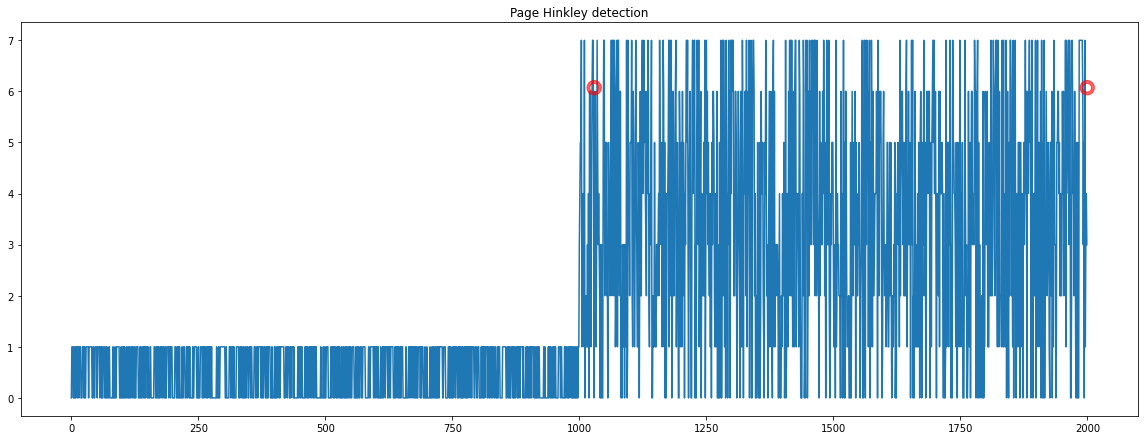

In [8]:
from river.drift import ADWIN, PageHinkley
detected_indices=perform_test(PageHinkley(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("Page Hinkley detection")

Text(0.5, 1.0, 'ADWIN detection')

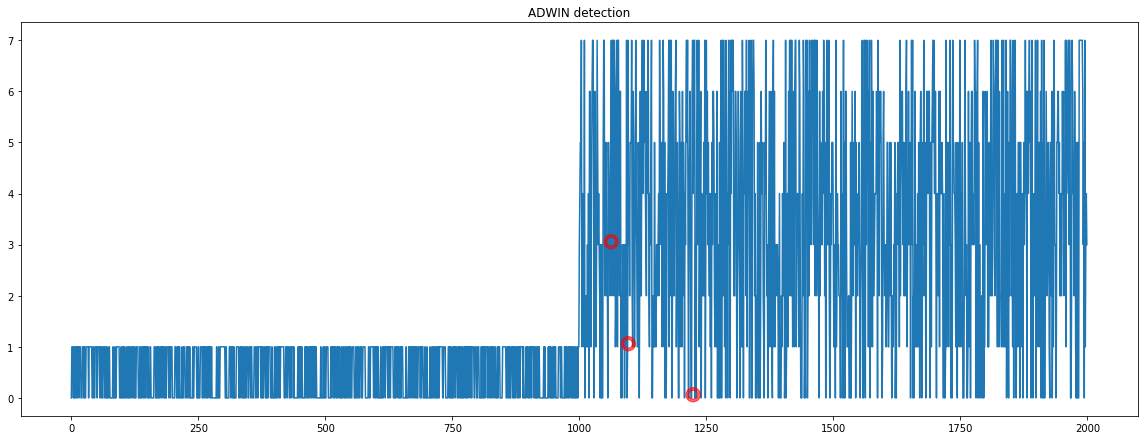

In [9]:
detected_indices_adwin = perform_test(ADWIN(), data_stream)
show_drift(data_stream, detected_indices_adwin)
plt.title("ADWIN detection")